## Observations and Insights 

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(mouse_metadata)
print(study_results_path)
# Combine the data into a single dataset

data/Study_results.csv


In [2]:
merged_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
Unique_Mice = merged_df["Mouse ID"].nunique()
print(f"There is {Unique_Mice} mice in the study")

There is 249 mice in the study


In [6]:
#Create new column with ID as Mouse ID + Timepoint
merged_df["MouseTime_ID"] = str(mouse_metadata["Mouse ID"]) + str(study_results["Timepoint"])
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID
0,k403,Ramicane,Male,21,16,0,45.000000,0,0 k403\n1 s185\n2 x401\n3 ...
1,k403,Ramicane,Male,21,16,5,38.825898,0,0 k403\n1 s185\n2 x401\n3 ...
2,k403,Ramicane,Male,21,16,10,35.014271,1,0 k403\n1 s185\n2 x401\n3 ...
3,k403,Ramicane,Male,21,16,15,34.223992,1,0 k403\n1 s185\n2 x401\n3 ...
4,k403,Ramicane,Male,21,16,20,32.997729,1,0 k403\n1 s185\n2 x401\n3 ...


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df["Duplicated"] = merged_df["MouseTime_ID"].duplicated()



In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_duplicates_df = merged_df[merged_df["Duplicated"]==True]
merged_duplicates_df



In [9]:
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,0 k403\n1 s185\n2 x401\n3 ...,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,0 k403\n1 s185\n2 x401\n3 ...,True
2,k403,Ramicane,Male,21,16,10,35.014271,1,0 k403\n1 s185\n2 x401\n3 ...,True
3,k403,Ramicane,Male,21,16,15,34.223992,1,0 k403\n1 s185\n2 x401\n3 ...,True
4,k403,Ramicane,Male,21,16,20,32.997729,1,0 k403\n1 s185\n2 x401\n3 ...,True


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

merged_clean_df = merged_df.drop_duplicates(subset = ['Mouse ID','Timepoint'], keep='first')


In [11]:
merged_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,0 k403\n1 s185\n2 x401\n3 ...,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,0 k403\n1 s185\n2 x401\n3 ...,True
2,k403,Ramicane,Male,21,16,10,35.014271,1,0 k403\n1 s185\n2 x401\n3 ...,True
3,k403,Ramicane,Male,21,16,15,34.223992,1,0 k403\n1 s185\n2 x401\n3 ...,True
4,k403,Ramicane,Male,21,16,20,32.997729,1,0 k403\n1 s185\n2 x401\n3 ...,True


In [12]:
# Checking the number of mice in the clean DataFrame.
mouse_count = merged_clean_df["Mouse ID"].nunique()
mouse_count

249

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [14]:
#Groupby regimen
Drug_Regimen_grouped = 	merged_clean_df.groupby(["Drug Regimen"])

In [15]:
#Tumor Mean
Tumor_Volume_mean = Drug_Regimen_grouped["Tumor Volume (mm3)"].mean()


In [16]:
# Tumor median
Tumor_Volume_median = Drug_Regimen_grouped["Tumor Volume (mm3)"].median()


In [20]:
# Tumor variance
Tumor_Volume_variance = Drug_Regimen_grouped["Tumor Volume (mm3)"].var()


In [17]:
# Tumor standard deviation
Tumor_Volume_std = Drug_Regimen_grouped["Tumor Volume (mm3)"].std()


In [18]:
# Tumor SEM
Tumor_Volume_SEM = Drug_Regimen_grouped["Tumor Volume (mm3)"].sem()

In [21]:
tumor_sum_stat_df = pd.DataFrame({"Mean":Tumor_Volume_mean ,"Medium":Tumor_Volume_median , "Variance":Tumor_Volume_variance ,"STD":Tumor_Volume_std , "SEM":Tumor_Volume_SEM})
tumor_sum_stat_df

,Mean,Medium,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


In [23]:
Drug_Regimen_grouped.agg({"Tumor Volume (mm3)":["mean","median","var","std"]})

Tumor Volume (mm3)                                
                           mean     median        var       std
Drug Regimen                                                   
Capomulin             40.675741  41.557809  24.947764  4.994774
Ceftamin              52.591172  51.776157  39.290177  6.268188
Infubinol             52.884795  51.820584  43.128684  6.567243
Ketapril              55.235638  53.698743  68.553577  8.279709
Naftisol              54.331565  52.509285  66.173479  8.134708
Placebo               54.033581  52.288934  61.168083  7.821003
Propriva              52.393463  50.909965  43.138803  6.568014
Ramicane              40.216745  40.673236  23.486704  4.846308
Stelasyn              54.233149  52.431737  59.450562  7.710419
Zoniferol             53.236507  51.818479  48.533355  6.966589

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



In [25]:
# Work out number of mice in each drug regimen
regimen_mouse_count = Drug_Regimen_grouped["Mouse ID"].count()
regimen_mouse_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

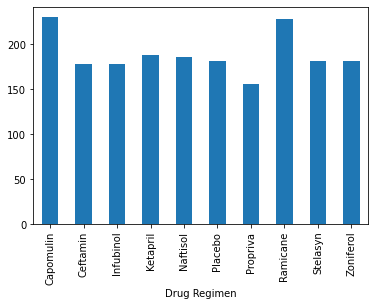

<Figure size 432x288 with 0 Axes>

In [26]:
mouse_chart = regimen_mouse_count.plot(kind="bar")
# regimen_mouse_count.set_xlabel("Drug Regimen")
# regimen_mouse_count.set_ylabel("Mouse count")
plt.show()
plt.tight_layout()

In [76]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
        # x_axis = regimen_mouse_count["Mouse ID"]
        # y_axis = regimen_mouse_count["Drug Regimen"]

        # plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")


In [ ]:
## Bar and Pie Charts

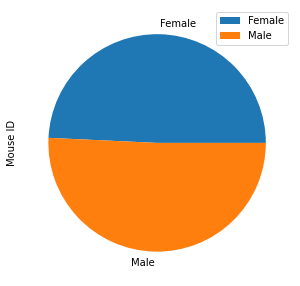

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_grouped = merged_clean_df.groupby(["Sex"]).count()
gender_grouped
sex_pie_chart = gender_grouped.plot.pie(y ="Mouse ID",figsize=(5,5))


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [48]:
Last_df.head()

Drug Regimen
Capomulin    45
Ceftamin     45
Infubinol    45
Ketapril     45
Naftisol     45
Name: Timepoint, dtype: int64

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Last_df = merged_clean_df.groupby(["Mouse ID"])["Timepoint"].max() 
Last_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Last_Tumor_df = pd.merge(merged_clean_df,Last_df, on="Mouse ID",)
Last_Tumor_df
Last_Tumor_df['Mouse ID'].nunique()


249

In [108]:
Last_Tumor_df.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID,Duplicated,Timepoint_y
1883,z969,Naftisol,Male,9,30,25,63.145652,2,0 k403\n1 s185\n2 x401\n3 ...,True,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,0 k403\n1 s185\n2 x401\n3 ...,True,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,0 k403\n1 s185\n2 x401\n3 ...,True,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,0 k403\n1 s185\n2 x401\n3 ...,True,45
1887,z969,Naftisol,Male,9,30,45,73.867845,4,0 k403\n1 s185\n2 x401\n3 ...,True,45


In [105]:
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID,Duplicated,Timepoint_y
10,s185,Capomulin,Female,3,17,0,45.000000,0,0 k403\n1 s185\n2 x401\n3 ...,True,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,0 k403\n1 s185\n2 x401\n3 ...,True,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,0 k403\n1 s185\n2 x401\n3 ...,True,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,0 k403\n1 s185\n2 x401\n3 ...,True,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,0 k403\n1 s185\n2 x401\n3 ...,True,45


In [106]:
Capomulin_df["Mouse ID"].nunique()

25

In [104]:
Capomulin_last_df = Capomulin_df[Capomulin_df["Timepoint_x"]==Capomulin_df["Timepoint_y"]]
Capomulin_last_df.head()

#merged_duplicates_df = merged_df[merged_df["Duplicated"]==True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID,Duplicated,Timepoint_y
19,s185,Capomulin,Female,3,17,45,23.343598,1,0 k403\n1 s185\n2 x401\n3 ...,True,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,0 k403\n1 s185\n2 x401\n3 ...,True,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,0 k403\n1 s185\n2 x401\n3 ...,True,45
64,f966,Capomulin,Male,16,17,20,30.485985,0,0 k403\n1 s185\n2 x401\n3 ...,True,20
104,u364,Capomulin,Male,18,17,45,31.023923,3,0 k403\n1 s185\n2 x401\n3 ...,True,45


In [119]:
# Ramicane_df 
Ramicane_df = Last_Tumor_df[Last_Tumor_df["Drug Regimen"]=="Ramicane"]
# Ramicane_last_df
Ramicane_last_df= Ramicane_df[Ramicane_df["Timepoint_x"]==Ramicane_df["Timepoint_y"]]
Ramicane_last_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID,Duplicated,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,0 k403\n1 s185\n2 x401\n3 ...,True,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,0 k403\n1 s185\n2 x401\n3 ...,True,45
59,s508,Ramicane,Male,1,17,45,30.276232,0,0 k403\n1 s185\n2 x401\n3 ...,True,45
74,m546,Ramicane,Male,18,16,45,30.564625,1,0 k403\n1 s185\n2 x401\n3 ...,True,45
84,z578,Ramicane,Male,11,16,45,30.638696,0,0 k403\n1 s185\n2 x401\n3 ...,True,45


In [117]:
# Infubinol_df
Infubinol_df = Last_Tumor_df[Last_Tumor_df["Drug Regimen"]=="Infubinol"]
# Infubinol_last_df
Infubinol_last_df = Infubinol_df[Infubinol_df["Timepoint_x"]==Infubinol_df["Timepoint_y"]]

In [118]:
# Ceftamin_df
Ceftamin_df = Last_Tumor_df[Last_Tumor_df["Drug Regimen"]=="Ceftamin"]
# Ceftamin_last_df
Ceftamin_last_df= Ceftamin_df[Ceftamin_df["Timepoint_x"]==Ceftamin_df["Timepoint_y"]]

In [125]:
Selected_df =Capomulin_last_df.append(Capomulin_last_df)

In [126]:
Selected_df = Selected_df.append(Ramicane_last_df)
Selected_df = Selected_df.append(Ceftamin_last_df)
Selected_df = Selected_df.append(Infubinol_last_df)

In [129]:
Selected_df.groupby(["Drug Regimen"])["Mouse ID"].count()

Drug Regimen
Capomulin    50
Ceftamin     25
Infubinol    25
Ramicane     25
Name: Mouse ID, dtype: int64

In [141]:
fig1, ax1 = plt.subplots()
fig1, ax2 = plt.subplots()
fig1, ax3 = plt.subplots()
fig1, ax4 = plt.subplots()
ax1.set_title("Ceftamin")
ax1.set_ylabel('Tumor Size')
ax2.set_title("Capomulin")
ax2.set_ylabel('Tumor Size')
ax3.set_title("Ramicane")
ax3.set_ylabel('Tumor Size')
ax4.set_title("Infubinol")
ax4.set_ylabel('Tumor Size')
ax1.boxplot(Ceftamin_last_df["Tumor Volume (mm3)"])
ax2.boxplot(Capomulin_last_df["Tumor Volume (mm3)"])
ax3.boxplot(Ramicane_last_df["Tumor Volume (mm3)"])
ax4.boxplot(Infubinol_last_df["Tumor Volume (mm3)"])
# quartiles = temperatures.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

plt.show()

NameError: name 'temperatures' is not defined

In [86]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

Capomulin_results = []
Ramicane_results = []
Infubinol_results = []
Ceftamin_results = []


for row in Last_Tumor_df:
    if Last_Tumor_df.iloc(1)==treatments[0] and Last_Tumor_df.loc["Timepoint_x"]==Last_Tumor_df.loc["Timepoint_y"]:
        Capomulin_results.append(["Tumor Volume (mm3)"])
    # if ["Drug Regimen"]==treatments[1] and ["Timepoint_x"]==["Timepoint_y"]:
    #     Ramicane_results.append(Last_Tumor_df["Tumor Volume (mm3)"])
    # if ["Drug Regimen"]==treatments[2] and ["Timepoint_x"]==["Timepoint_y"]:
    #     Infubinol_results.append(Last_Tumor_df["Tumor Volume (mm3)"])
    # if ["Drug Regimen"]==treatments[3] and ["Timepoint_x"]==["Timepoint_y"]:
    #     Ceftamin_results.append(Last_Tumor_df["Tumor Volume (mm3)"])

 #     print('yes')
    # else:
    #     print('no')



# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [88]:
len(Capomulin_results)

0

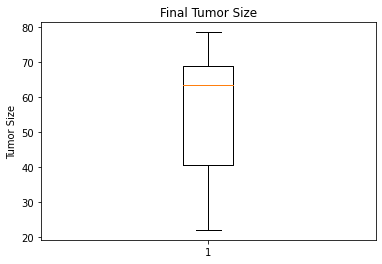

In [108]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Size")
ax1.set_ylabel('Tumor Size')
ax1.boxplot(Last_Tumor_grouped)
plt.show()

## Line and Scatter Plots

In [154]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_s185_df = Capomulin_df[Capomulin_df["Mouse ID"]=="s185"]

Capomulin_s185_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,MouseTime_ID,Duplicated,Timepoint_y
10,s185,Capomulin,Female,3,17,0,45.000000,0,0 k403\n1 s185\n2 x401\n3 ...,True,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,0 k403\n1 s185\n2 x401\n3 ...,True,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,0 k403\n1 s185\n2 x401\n3 ...,True,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,0 k403\n1 s185\n2 x401\n3 ...,True,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,0 k403\n1 s185\n2 x401\n3 ...,True,45


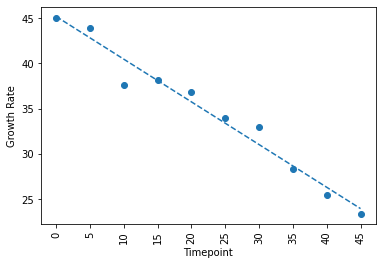

In [156]:
growth_rate = Capomulin_s185_df.iloc[:, 6]
Timepoint = Capomulin_s185_df.iloc[:, 5]
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(Timepoint, growth_rate)
m_fit = m_slope * Timepoint + m_int
plt.scatter(Timepoint,growth_rate)
plt.plot(Timepoint,m_fit,"--")
plt.xticks(Timepoint, rotation=90)
plt.xlabel('Timepoint')
plt.ylabel('Growth Rate')
plt.show()

Text(0, 0.5, 'Avg Tumor Volume (mm3)')

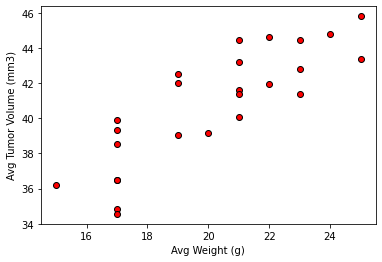

In [165]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(Capomulin_df.groupby(["Mouse ID"])["Weight (g)"].mean(),Capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean(),marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Avg Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

## Correlation and Regression

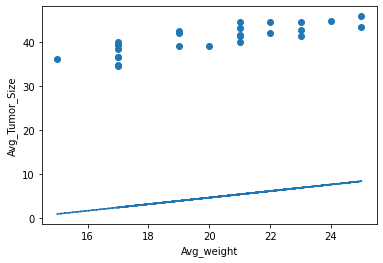

(0.8419363424694717, 1.322572243471279e-07)

In [194]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# plt.scatter(Capomulin_df.groupby(["Mouse ID"])["Weight (g)"].mean(),Capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean(),marker="o", facecolors="red", edgecolors="black")
# plt.xlabel("Avg Weight (g)")
# plt.ylabel("Avg Tumor Volume (mm3)")


Avg_weight = Capomulin_df.groupby(["Mouse ID"])["Weight (g)"].mean()
Avg_Tumor_Size = Capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress (Avg_Tumor_Size, Avg_weight)
m_fit = m_slope * Avg_weight + m_int
plt.scatter(Avg_weight,Avg_Tumor_Size)
plt.plot(Avg_weight,m_fit,"--")
# plt.xticks(Timepoint, rotation=90)
plt.xlabel('Avg_weight')
plt.ylabel('Avg_Tumor_Size')
plt.show()

st.pearsonr(Capomulin_df.groupby(["Mouse ID"])["Weight (g)"].mean(),Capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean())



In [189]:
Capomulin_df.groupby(["Mouse ID"])["Weight (g)"].mean()

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

In [190]:
Capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64